# Question Q12

*Question*: Based on your experience, what activities do you consider to be most difficult when defining requirements for ML-enabled systems?

*Answer Type*: Multiple Option and Free Field

*Options*: [Managing customer expectations, Eliciting and analyzing requirements, Aligning requirements with data quality issues (e.g., missing data, concept drift/changes on data over time), Dealing with conflicts between requirements (e.g., accuracy vs explainability), Dealing with new types of quality attributes (e.g., fairness, security, explainability...), Documenting requirements, Selecting proper evaluation metrics, Verifying requirements, Dealing with changing requirements, Other please specify]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values, format_wordcloud_text
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

In [4]:
# question options
activities = {
    'Q12_ML_Most_Difficult_Activity_Customer_Expectactions': 'Customer Expectactions',
    'Q12_ML_Most_Difficult_Activity_Eliciting_Analyzing': 'Eliciting Analyzing',
    'Q12_ML_Most_Difficult_Activity_Aligning_Requirements_Data': 'Aligning Requirements Data',
    'Q12_ML_Most_Difficult_Activity_Conflicts': 'Conflicts',
    'Q12_ML_Most_Difficult_Activity_New_Quality_Attributes': 'New Quality Attributes',
    'Q12_ML_Most_Difficult_Activity_Documentation': 'Documentation',
    'Q12_ML_Most_Difficult_Activity_Selecting_Metrics': 'Selecting Metrics',
    'Q12_ML_Most_Difficult_Activity_Verification': 'Verification',
    'Q12_ML_Most_Difficult_Activity_Changing_Requirements': 'Changing Requirements',
    'Q12_ML_Most_Difficult_Activity_Others': 'Others'
}

### Basic Analysis

In [5]:
dataframe_obj.df[['Q12_ML_Most_Difficult_Activity_Customer_Expectactions', 
                  'Q12_ML_Most_Difficult_Activity_Eliciting_Analyzing', 
                  'Q12_ML_Most_Difficult_Activity_Aligning_Requirements_Data', 
                  'Q12_ML_Most_Difficult_Activity_Conflicts', 
                  'Q12_ML_Most_Difficult_Activity_New_Quality_Attributes', 
                  'Q12_ML_Most_Difficult_Activity_Documentation',
                  'Q12_ML_Most_Difficult_Activity_Selecting_Metrics',
                  'Q12_ML_Most_Difficult_Activity_Verification',
                  'Q12_ML_Most_Difficult_Activity_Changing_Requirements',
                  'Q12_ML_Most_Difficult_Activity_Others',
                  'Q12_ML_Most_Difficult_Activity_Others_Free']].head()

,Q12_ML_Most_Difficult_Activity_Customer_Expectactions,Q12_ML_Most_Difficult_Activity_Eliciting_Analyzing,Q12_ML_Most_Difficult_Activity_Aligning_Requirements_Data,Q12_ML_Most_Difficult_Activity_Conflicts,Q12_ML_Most_Difficult_Activity_New_Quality_Attributes,Q12_ML_Most_Difficult_Activity_Documentation,Q12_ML_Most_Difficult_Activity_Selecting_Metrics,Q12_ML_Most_Difficult_Activity_Verification,Q12_ML_Most_Difficult_Activity_Changing_Requirements,Q12_ML_Most_Difficult_Activity_Others,Q12_ML_Most_Difficult_Activity_Others_Free
0,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
1,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
2,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,-99
3,quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,-99
4,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99


In [6]:
indexes = []
values = []
chart_positions = []
for activity in activities:
    indexes.append(activities[activity])
    values.append(dataframe_obj.df[activity].value_counts()['quoted'])
    chart_positions.append(1 if '_Others' not in activity else 0)

In [7]:
# compute total of unique answers in this question
total = 0
for idx, row in dataframe_obj.df.iterrows():
    if row['Q12_ML_Most_Difficult_Activity_Customer_Expectactions'] == 'quoted' or row['Q12_ML_Most_Difficult_Activity_Eliciting_Analyzing'] == 'quoted' or row['Q12_ML_Most_Difficult_Activity_Aligning_Requirements_Data'] == 'quoted' or row['Q12_ML_Most_Difficult_Activity_Conflicts'] == 'quoted' or row['Q12_ML_Most_Difficult_Activity_New_Quality_Attributes'] == 'quoted' or row['Q12_ML_Most_Difficult_Activity_Documentation'] == 'quoted' or row['Q12_ML_Most_Difficult_Activity_Selecting_Metrics'] == 'quoted' or row['Q12_ML_Most_Difficult_Activity_Verification'] == 'quoted' or row['Q12_ML_Most_Difficult_Activity_Changing_Requirements'] == 'quoted' or row['Q12_ML_Most_Difficult_Activity_Others'] == 'quoted':
        total += 1

total_answers = 'N = ' + str(total)
total_answers_int = total

In [8]:
# plot object
q12_plot = PlotUtils(pd.DataFrame(
    data={'Most Difficult Activities': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Answers'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-lcinjCty\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


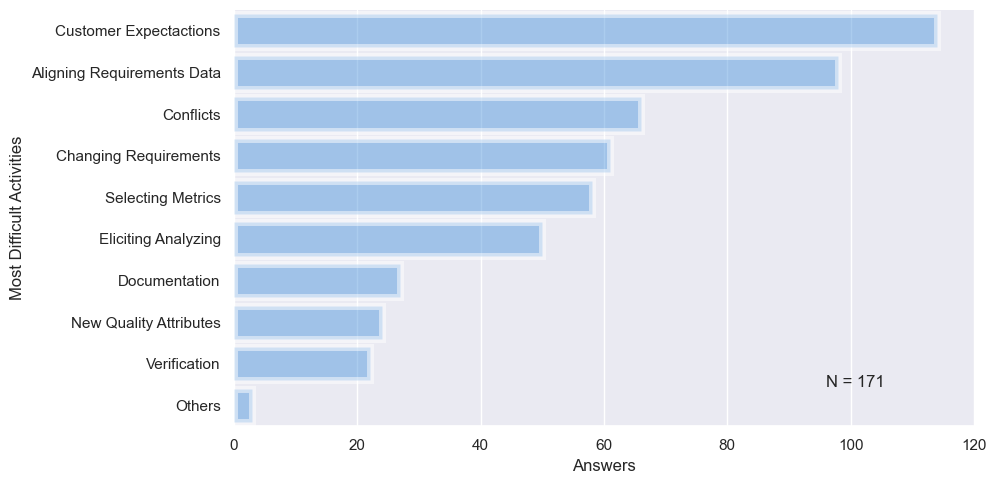

In [9]:
q12_plot.single_barplot(x_axis="Answers", y_axis="Most Difficult Activities",
                        # title="Based on your experience, what activities do you consider to be most difficult when defining requirements for ML-enabled systems?",
                        title="",
                        x_label="Answers", y_label="Most Difficult Activities", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

#### WordCloud

In [10]:
# remove unnecessary values
activities_free = list(filter(lambda a: str(a) != '-99', 
                           list(dataframe_obj.df['Q12_ML_Most_Difficult_Activity_Others_Free'])))
activities_free = list(filter(lambda a: str(a) != '-66', activities_free))
activities_free = list(filter(lambda a: str(a) != 'nan', activities_free))

In [11]:
activities_words = format_wordcloud_text(texts=activities_free, use_sep=False)

In [12]:
# plot object
q12_wc_plot = PlotUtils(pd.DataFrame(
    data={'Word': list(activities_words.keys()), 'Weight': list(activities_words.values())}
))

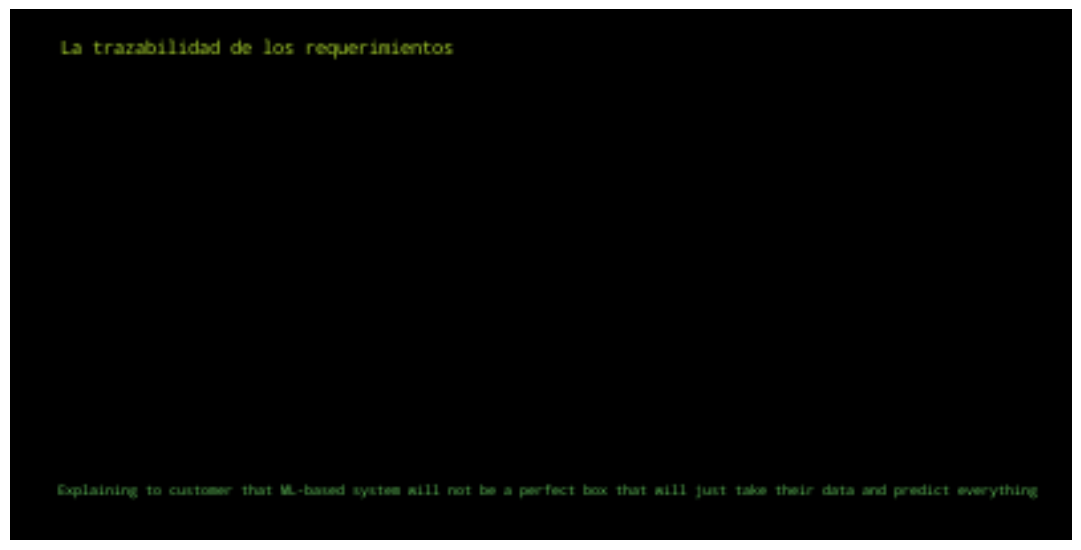

In [13]:
q12_wc_plot.wordcloud("Word", 'Weight')

### Bootstrapping Analysis

In [14]:
prefix = "Q12_ML_Most_Difficult_Activity_"

In [15]:
# the possible answers are the ones in columns
valid_options_list = [activity_column.split(prefix)[1] for activity_column in activities]

In [16]:
# answers could be composed by more than one option, so we will have an array of selected options
valid_answers_list = []
for idx, row in dataframe_obj.df.iterrows():
    answer = []
    for option in valid_options_list:
        if row[prefix + option] == 'quoted':
            answer.append(option)
    
    # if answer is empty, we assume that 'Others' was assigned - in terms of meaning 'Other context not listed'
#     if not answer:
#         answer = ['Others']
    valid_answers_list.append(answer)

In [17]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [18]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping(question_type="multiple")

In [19]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
chart_positions = []
for idx in bootstrapped_dict_data:
    indexes += [activities[prefix + idx] for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']
    chart_positions += [1 if 'Others' not in idx else 0 for _ in range(len(bootstrapped_dict_data[idx]['population']))]

In [20]:
values = [100 * v for v in values]

In [21]:
# plot object for bootstrapped data
q12_boot_plot = PlotUtils(pd.DataFrame(
    data={'Most Difficult Activities': indexes, 'Value': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Value'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-lcinjCty\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


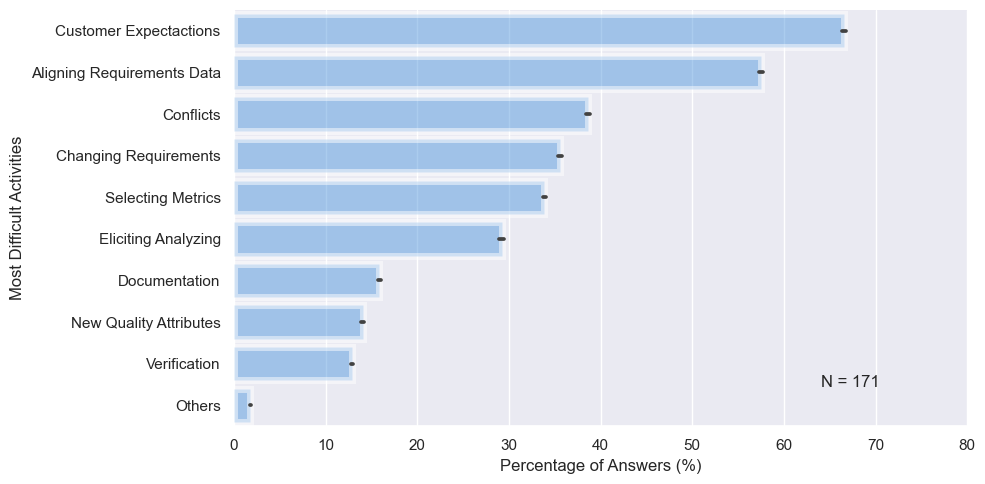

In [22]:
q12_boot_plot.single_barplot(x_axis="Value", y_axis="Most Difficult Activities", 
                       # title="Bootstrapping - 95% confidence \n Based on your experience, what activities do you consider to be most difficult when defining requirements for ML-enabled systems?",
                       title="",
                             x_label="Percentage of Answers (%)", y_label="Most Difficult Activities", x_label_rotation=0, color="#429bf5",
                       total_answers=total_answers)

In [23]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
tuples = []
for idx in bootstrapped_dict_data:
    tuples.append((idx, bootstrapped_dict_data[idx]['confidence'][1]))
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
Customer_Expectactions:(0.6637651631698875, 0.6658538011695907, 0.6679424391692939)
Eliciting_Analyzing:(0.28968554573261374, 0.2920584795321638, 0.29443141333171385)
Aligning_Requirements_Data:(0.5726332728064263, 0.5749766081871345, 0.5773199435678427)
Conflicts:(0.38401398884860466, 0.38634502923976616, 0.38867606963092766)
New_Quality_Attributes:(0.13875752436194436, 0.14045029239766083, 0.1421430604333773)
Documentation:(0.1569016389605183, 0.15856725146198833, 0.16023286396345834)
Selecting_Metrics:(0.3366600155897074, 0.3387426900584795, 0.34082536452725165)
Verification:(0.12697670662615004, 0.12873099415204678, 0.13048528167794352)
Changing_Requirements:(0.3535031214709421, 0.3557485380116959, 0.35799395455244976)
Others:(0.017491527997056982, 0.018052631578947365, 0.01861373516083775)


In [24]:
from operator import itemgetter
tuples_sorted = sorted(tuples, key=itemgetter(1))

for ts in tuples_sorted[::-1]:
    print(ts[0] + ',' + str(round((ts[1] * 100), 2)))

Customer_Expectactions,66.59
Aligning_Requirements_Data,57.5
Conflicts,38.63
Changing_Requirements,35.57
Selecting_Metrics,33.87
Eliciting_Analyzing,29.21
Documentation,15.86
New_Quality_Attributes,14.05
Verification,12.87
Others,1.81


In [25]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
Customer_Expectactions:: P = 66.585 [66.377, 66.794]
Eliciting_Analyzing:: P = 29.206 [28.969, 29.443]
Aligning_Requirements_Data:: P = 57.498 [57.263, 57.732]
Conflicts:: P = 38.635 [38.401, 38.868]
New_Quality_Attributes:: P = 14.045 [13.876, 14.214]
Documentation:: P = 15.857 [15.69, 16.023]
Selecting_Metrics:: P = 33.874 [33.666, 34.083]
Verification:: P = 12.873 [12.698, 13.049]
Changing_Requirements:: P = 35.575 [35.35, 35.799]
Others:: P = 1.805 [1.749, 1.861]
